In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv(r'F:\ML\100 days ml\data\train.csv',usecols=['Age','Fare','Survived'])

In [4]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [5]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape


(714, 3)

In [8]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
885,0,39.0,29.1250
886,0,27.0,13.0000
887,1,19.0,30.0000
889,1,26.0,30.0000


In [9]:
x=df.drop(columns=["Survived"])
y=df["Survived"]

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [11]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [12]:
clf=DecisionTreeClassifier()

In [13]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.6223776223776224

In [14]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring="accuracy"))

0.6303208137715179

In [15]:
kBins_age=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbins_fare=KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")

In [16]:
trf=ColumnTransformer([
    ("first",kBins_age,[0]),
    ("second",kbins_fare,[1])
])

In [17]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [18]:
trf.named_transformers_["first"].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [19]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [20]:
output

,age,age_trf,fare,fare_trf
328,31.0,8.0,20.5250,8.0
73,26.0,6.0,14.4542,7.0
253,30.0,8.0,16.1000,7.0
719,33.0,9.0,7.7750,2.0
666,25.0,6.0,13.0000,6.0
...,...,...,...,...
92,46.0,12.0,61.1750,12.0
134,25.0,6.0,13.0000,6.0
337,41.0,11.0,134.5000,14.0
548,33.0,9.0,20.5250,8.0


In [ ]:
output['age_labels'] = pd.cut(x=x_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=x_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [26]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,8.0,20.5250,8.0,"(30.0, 32.0]","(19.0, 21.0]"
73,26.0,6.0,14.4542,7.0,"(25.0, 28.0]","(6.0, 16.0]"
253,30.0,8.0,16.1000,7.0,"(28.0, 30.0]","(16.0, 19.0]"
719,33.0,9.0,7.7750,2.0,"(32.0, 35.0]","(6.0, 16.0]"
666,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(6.0, 16.0]"
...,...,...,...,...,...,...
92,46.0,12.0,61.1750,12.0,"(42.0, 47.0]","(54.0, 80.0]"
134,25.0,6.0,13.0000,6.0,"(23.0, 25.0]","(6.0, 16.0]"
337,41.0,11.0,134.5000,14.0,"(38.0, 42.0]",NaN
548,33.0,9.0,20.5250,8.0,"(32.0, 35.0]","(19.0, 21.0]"


In [28]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
535,7.0,1.0,26.250,9.0,"(6.0, 16.0]","(25.0, 28.0]"
604,35.0,10.0,26.550,10.0,"(32.0, 35.0]","(25.0, 28.0]"
208,16.0,2.0,7.750,1.0,"(6.0, 16.0]","(6.0, 16.0]"
119,2.0,0.0,31.275,11.0,"(0.42, 6.0]","(30.0, 32.0]"
234,24.0,5.0,10.500,5.0,"(23.0, 25.0]","(6.0, 16.0]"


In [31]:
clf=DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [32]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [39]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("AGE: Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("FARE: Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()

0.6261150234741784


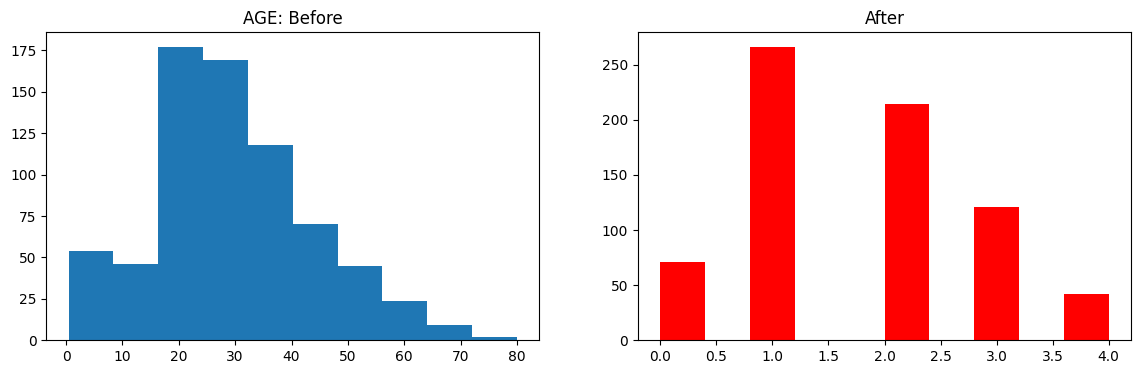

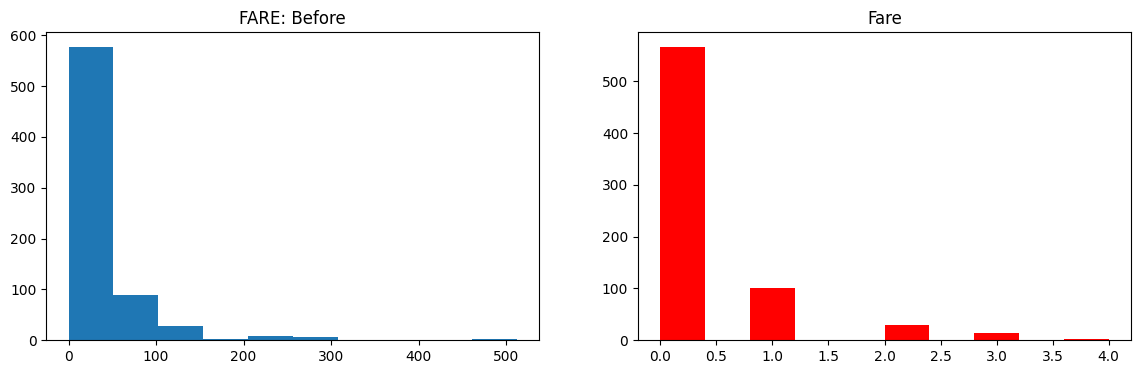

In [40]:
discretize(5,'kmeans')